In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/Bengali/valid_gray.zip /content/
!cp /content/drive/My\ Drive/Bengali/train_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/valid_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/train_gray.zip /content/

In [0]:
!pip uninstall tensorflow
!pip install tensorflow-gpu

In [46]:
import cv2
from tqdm import tqdm_notebook as tqdm
import os
import zipfile
import io
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tf.__version__

'2.1.0'

# Classifying Graheme Roots

In [0]:
!mkdir /content/valid_gray
!mv valid_gray.zip /content/valid_gray/
os.chdir('/content/valid_gray/')
!unzip valid_gray.zip

os.chdir('/content')

!mkdir /content/train_gray/
!mv train_gray.zip /content/train_gray/
os.chdir('/content/train_gray/')
!unzip train_gray.zip

os.chdir('/content')

In [0]:
train_gen_df = pd.read_csv('train_gen.csv', dtype=str)
valid_gen_df = pd.read_csv('valid_gen.csv', dtype=str)

### 167 unique target classes to train on

[]

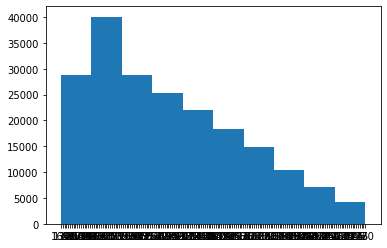

In [69]:
plt.hist(train_gen_df['class'])
plt.plot()

### class imbalance detected!!!!

[]

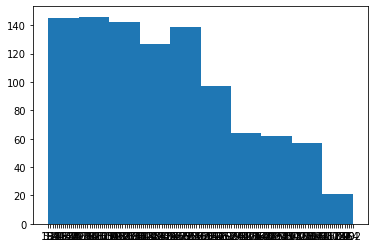

In [70]:
plt.hist(valid_gen_df['class'])
plt.plot()

In [0]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 as inception_net

In [0]:
base_model = inception_net(include_top=False)

In [0]:
x = base_model.output
x = (GlobalAveragePooling2D())(x)
preds = (Dense(168, activation='softmax'))(x)

model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers:
    layer.trainable=False
for layer in model.layers[-1:]:
    layer.trainable=True

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [154]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_gen_df,
        directory='/content/train_gray/train_gray/',
        x_col="images",
        y_col="class",
        target_size=(299, 299),
        batch_size=32)

validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_gen_df,
        directory='/content/valid_gray/valid_gray/',
        x_col="images",
        y_col="class",
        target_size=(299, 299),
        batch_size=32)

Found 199840 validated image filenames belonging to 168 classes.
Found 1000 validated image filenames belonging to 149 classes.


In [155]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_821 (Conv2D)             (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_826 (BatchN (None, None, None, 3 96          conv2d_821[0][0]                 
__________________________________________________________________________________________________
activation_812 (Activation)     (None, None, None, 3 0           batch_normalization_826[0][0]    
____________________________________________________________________________________________

In [156]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = model.fit_generator(generator=train_generator,
                              validation_data=validation_generator,
                              validation_steps=STEP_SIZE_VALID,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6245 steps, validate for 31 steps
Epoch 1/10
 642/6245 [==>...........................] - ETA: 59:53 - loss: 4.6064 - accuracy: 0.0567

KeyboardInterrupt: ignored

In [0]:
import pickle
with open('/trainHistoryDict.npy', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [0]:
from google.colab import files
files.download('/trainHistoryDict')